In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import calendar

pd.set_option('display.max_columns', None) #mostrar todas as colunas
pd.set_option('display.max_rows', 50)  #mostrar no max 50 linhas
pd.set_option('display.max_colwidth', None)  #mostrar a grossura máxima das colunas

In [11]:
df = pd.read_excel('fake_dataset.xlsx')
df.to_csv('fake_dataset.csv')
df = pd.read_csv("fake_dataset.csv")
df = df.drop(columns =['Unnamed: 0','Unnamed: 0.1']) #ele cria essas colunas

In [12]:
df.shape

(700, 23)

In [15]:
df.head(2)

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
0,2022-08-01,LGPKG-1090219,2710823,Aéreo de São Paulo,Aéreo para Fortaleza | Quarto Duplo ou Triplo | 7 Diárias (3 diárias em Fortaleza + 4 diárias em Jericoacoara).,Pacote de Viagem - Fortaleza + Jericoacoara - 2022,NAC,False,2022.0,Data flexível,Jericoacoara,Ceará,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",675.0,117.0,3470,660,1239,2891,0,2891,1
1,2022-08-01,LGPKG-1095820,2724406,Aéreo de Rio de Janeiro - 3 diárias + Ingresso 1 dia,"Aéreo para Florianópolis, Navegantes ou Joinville | 3 diárias em Balneário Camboriú em Quarto Duplo ou Triplo | Ingresso de 1 dia para o Parque Beto Carrero World.",Pacote de Viagem - Beto Carrero World - Segundo Semestre - 2023,NAC,False,2023.0,Data flexível,Balneário Camboriú,Santa Catarina,Brasil,"Hospedagem Econômica,Café da manhã,Ingresso,Passagem Aérea Econômica",2010.0,443.0,624,125,0,749,0,749,1


In [16]:
## I'm trying to answer the following question: how sales behave with day week? Which day sales the most?

In [34]:
#Add column with the day of the week
week_day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    week_day.append(date.day_name())
df['Week day'] = week_day

In [21]:
#No fake_dataset só tem segundas e tercas:
df['Week day'].value_counts()

Monday     499
Tuesday    201
Name: Week day, dtype: int64

<Axes: ylabel='sales'>

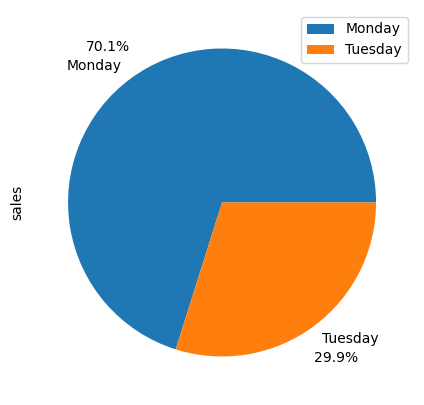

In [33]:
t = df.groupby(['Week day']).sum(['sales'])
plot2 = t.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot2

In [51]:
## I'm trying to answer the following question: how sales behave with day of month? Which day sales the most?

In [48]:
#Add column with days
day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    day.append(date.to_pydatetime().day)
df['day'] = day

<Axes: ylabel='sales'>

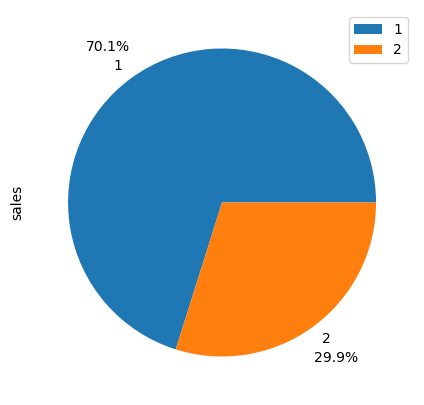

In [50]:
u = df.groupby(['day']).sum(['sales'])
plot1 = u.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot1

In [74]:
u = dict(df['destination_type'].value_counts())

In [75]:
#Group by destination_type and sum the column sales
i = dict(df.groupby('destination_type').sum()['sales'])

C:\Users\user\AppData\Local\Temp\ipykernel_13560\58718615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  i = dict(df.groupby('destination_type').sum()['sales'])


In [76]:
i

{'INT': 790, 'NAC': 1671}

In [78]:
total_sales = df['sales'].sum()

In [82]:
prop_sales_nac = list(i.values())[1]/total_sales
prop_sales_int = list(i.values())[0]/total_sales

In [80]:
i.values()

dict_values([790, 1671])

In [83]:
prop_sales_int

0.321007720438846

In [84]:
prop_sales_nac

0.678992279561154

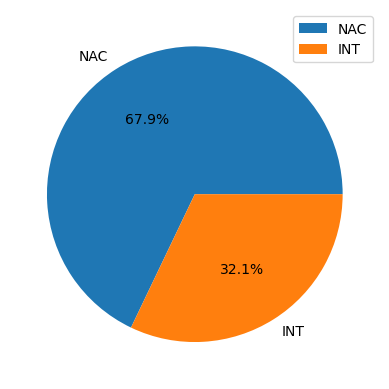

In [96]:
prop_sales = [prop_sales_nac, prop_sales_int]
labels = ["NAC", "INT"]
plt.pie(prop_sales, autopct='%1.1f%%', labels = labels)
plt.legend()
plt.show()

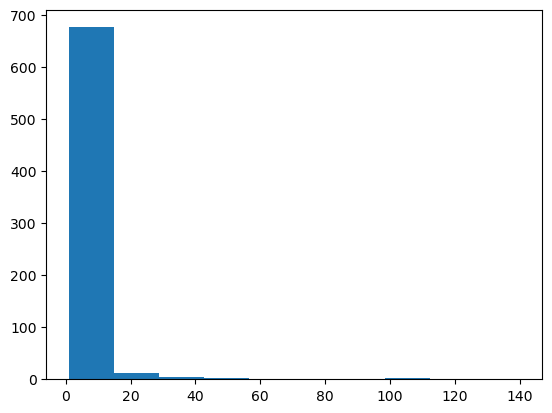

In [109]:
plt.hist(df['sales'], bins = 10)
plt.show()

In [111]:
#Reding the rows which name contains mega
df2 = df.loc[df['product_name'].str.contains('All')]

In [112]:
df2.shape

(47, 26)

In [114]:
## Em torno de 3% das vendas é de pacotes all inclusive:
df2['sales'].sum()/total_sales

0.03941487200325071

In [115]:
## O QUE FALTA: ENTENDER A DISTRIBUIÇÃO DISSO!